<a href="https://colab.research.google.com/github/namdarine/TIF_Chicago_Project/blob/main/Plot_Chciago_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import warnings
warnings.filterwarnings("ignore")
import pickle
import folium
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
JJ_path = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/data/'
K_path = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'
L_path = '/content/drive/MyDrive/IPRO/IPRO 497 TIF Districts/IPRO497_Demographic Team/Final/data/'

JJ_path_image = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/images/'

path = JJ_path
path_image = JJ_path_image

Community_area = gpd.read_file(path + 'Boundaries - Community Areas (current).geojson')

tifs = pd.read_csv(path + '2019_TIF_Boundaries.csv')
tifs = gpd.GeoDataFrame(tifs)
tifs = tifs.rename(columns={'the_geom': 'geometry'})
tifs['geometry'] = loads(tifs['geometry'])
tifs.set_geometry('geometry', inplace = True)

Blockgroup_boundary = pd.read_csv(path+'cleanBlockGroups.csv')
Blockgroup_boundary = Blockgroup_boundary.drop(columns=['coords'])
prefix = '1500000US'
Blockgroup_boundary['geoid'] = prefix + Blockgroup_boundary['geoid'].astype(str)


In [ ]:
# load pickle file
with open(path+'DemographicsDataframe.pickle', 'rb') as f:
	DemographicsDataframe = pickle.load(f)

with open(path+'racial_population.pickle', 'rb') as f:
	racial_population = pickle.load(f)

In [ ]:
with open(path+'year_race_community_Median_TIF.pickle', 'rb') as f:
	year_race_community_Median_TIF = pickle.load(f)
with open(path+'year_race_community_Median_Non_TIF.pickle', 'rb') as f:
	year_race_community_Median_Non_TIF = pickle.load(f)

with open(path+'year_race_community_Owner_TIF.pickle', 'rb') as f:
	year_race_community_Owner_TIF = pickle.load(f)
with open(path+'year_race_community_Owner_Non_TIF.pickle', 'rb') as f:
	year_race_community_Owner_Non_TIF = pickle.load(f)

with open(path+'year_race_community_Renter_TIF.pickle', 'rb') as f:
	year_race_community_Renter_TIF = pickle.load(f)
with open(path+'year_race_community_Renter_Non_TIF.pickle', 'rb') as f:
	year_race_community_Renter_Non_TIF = pickle.load(f)

with open(path+'year_race_community_Employment_TIF.pickle', 'rb') as f:
	year_race_community_Employment_TIF = pickle.load(f)
with open(path+'year_race_community_Employment_Non_TIF.pickle', 'rb') as f:
	year_race_community_Employment_Non_TIF = pickle.load(f)
year_race_community_Employment_TIF.head(3)

with open(path+'year_race_community_Unemployment_TIF.pickle', 'rb') as f:
	year_race_community_Unemployment_TIF = pickle.load(f)
with open(path+'year_race_community_Unemployment_Non_TIF.pickle', 'rb') as f:
	year_race_community_Unemployment_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationA_TIF.pickle', 'rb') as f:
	year_race_community_EducationA_TIF = pickle.load(f)
with open(path+'year_race_community_EducationA_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationA_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationB_TIF.pickle', 'rb') as f:
	year_race_community_EducationB_TIF = pickle.load(f)
with open(path+'year_race_community_EducationB_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationB_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationC_TIF.pickle', 'rb') as f:
	year_race_community_EducationC_TIF = pickle.load(f)
with open(path+'year_race_community_EducationC_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationC_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationD_TIF.pickle', 'rb') as f:
	year_race_community_EducationD_TIF = pickle.load(f)
with open(path+'year_race_community_EducationD_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationD_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationE_TIF.pickle', 'rb') as f:
	year_race_community_EducationE_TIF = pickle.load(f)
with open(path+'year_race_community_EducationE_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationE_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationF_TIF.pickle', 'rb') as f:
	year_race_community_EducationF_TIF = pickle.load(f)
with open(path+'year_race_community_EducationF_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationF_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationG_TIF.pickle', 'rb') as f:
	year_race_community_EducationG_TIF = pickle.load(f)
with open(path+'year_race_community_EducationG_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationG_Non_TIF = pickle.load(f)

with open(path+'year_race_community_AverageHousingPrice_TIF.pickle', 'rb') as f:
	year_race_community_AverageHousingPrice_TIF = pickle.load(f)
with open(path+'year_race_community_AverageHousingPrice_Non_TIF.pickle', 'rb') as f:
	year_race_community_AverageHousingPrice_Non_TIF = pickle.load(f)

In [ ]:
def plot_Chicago(year_race_community_TIF,year_race_community_Non_TIF):
  column_name = year_race_community_TIF.columns[1:]

  year = np.arange(2017,2023,1)
  metric_name = column_name[0].replace(' of White','')
  metric_name = metric_name.replace('/',' ')

  white_array = np.array(list(year_race_community_TIF[column_name[0]].to_dict().values()))
  white_df = pd.DataFrame(white_array)
  white_df = white_df.drop(white_df[white_df[0] == 0].index)
  White_TIF= np.mean(white_df,axis=0)

  Black_array = np.array(list(year_race_community_TIF[column_name[1]].to_dict().values()))
  Black_df = pd.DataFrame(Black_array)
  Black_df = Black_df.drop(Black_df[Black_df[0] == 0].index)
  Black_TIF= np.mean(Black_df,axis=0)

  Latin_array = np.array(list(year_race_community_TIF[column_name[2]].to_dict().values()))
  Latin_df = pd.DataFrame(Latin_array)
  Latin_df = Latin_df.drop(Latin_df[Latin_df[0] == 0].index)
  Latin_TIF= np.mean(Latin_df,axis=0)

  white_array = np.array(list(year_race_community_Non_TIF[column_name[0]].to_dict().values()))
  white_df = pd.DataFrame(white_array)
  white_df = white_df.drop(white_df[white_df[0] == 0].index)
  White_Non_TIF= np.mean(white_df,axis=0)

  Black_array = np.array(list(year_race_community_Non_TIF[column_name[1]].to_dict().values()))
  Black_df = pd.DataFrame(Black_array)
  Black_df = Black_df.drop(Black_df[Black_df[0] == 0].index)
  Black_Non_TIF= np.mean(Black_df,axis=0)

  Latin_array = np.array(list(year_race_community_Non_TIF[column_name[2]].to_dict().values()))
  Latin_df = pd.DataFrame(Latin_array)
  Latin_df = Latin_df.drop(Latin_df[Latin_df[0] == 0].index)
  Latin_Non_TIF= np.mean(Latin_df,axis=0)



  # White_TIF = np.mean(year_race_community_TIF[column_name[0]].apply(lambda x:np.array([x])))[0]
  # Black_TIF = np.mean(year_race_community_TIF[column_name[1]].apply(lambda x:np.array([x])))[0]
  # Latin_TIF = np.mean(year_race_community_TIF[column_name[2]].apply(lambda x:np.array([x])))[0]
  # White_Non_TIF = np.mean(year_race_community_Non_TIF[column_name[0]].apply(lambda x:np.array([x])))[0]
  # Black_Non_TIF = np.mean(year_race_community_Non_TIF[column_name[1]].apply(lambda x:np.array([x])))[0]
  # Latin_Non_TIF = np.mean(year_race_community_Non_TIF[column_name[2]].apply(lambda x:np.array([x])))[0]

  plt.figure(figsize=(10,5))

  plt.plot(year,White_TIF,marker='o',color='r',label='White inside TIF')
  plt.plot(year,White_Non_TIF,marker='^',color='r',linestyle='--',label='White outside TIF')

  plt.plot(year,Black_TIF,marker='o',color='b',label='Black inside TIF')
  plt.plot(year,Black_Non_TIF,marker='^',color='b',linestyle='--',label='Black outside TIF')
  plt.plot(year,Latin_TIF,marker='o',color='g',label='Latino inside TIF')
  plt.plot(year,Latin_Non_TIF,marker='^',color='g',linestyle='--',label='Latino outside TIF')
  plt.title(f'{metric_name} inside TIF vs outside TIF in Chicago')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.xlabel('Year')
  if metric_name in ['Median Income']:
    plt.ylabel(f'{metric_name} $')
  elif metric_name in['Housing Price']:
    plt.ylabel(f'{metric_name} $')
    plt.yticks(['100,000'])
  plt.ylabel(metric_name)
  plt.grid()
  plt.savefig(JJ_path_image+'Chicago/'+f'{metric_name} graph in Chicago.png',bbox_inches='tight')
  plt.show()

In [ ]:
'Median Income' in ['Housing Price','Median Income']

True

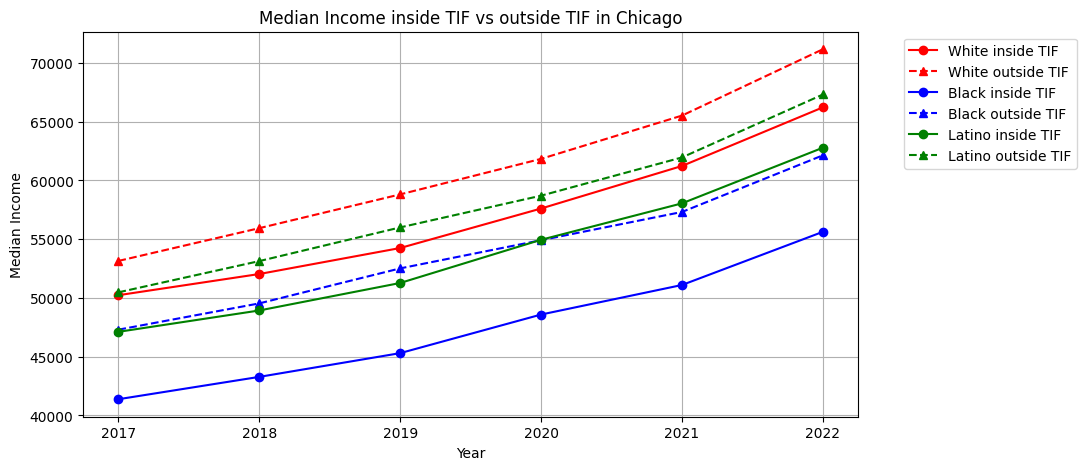

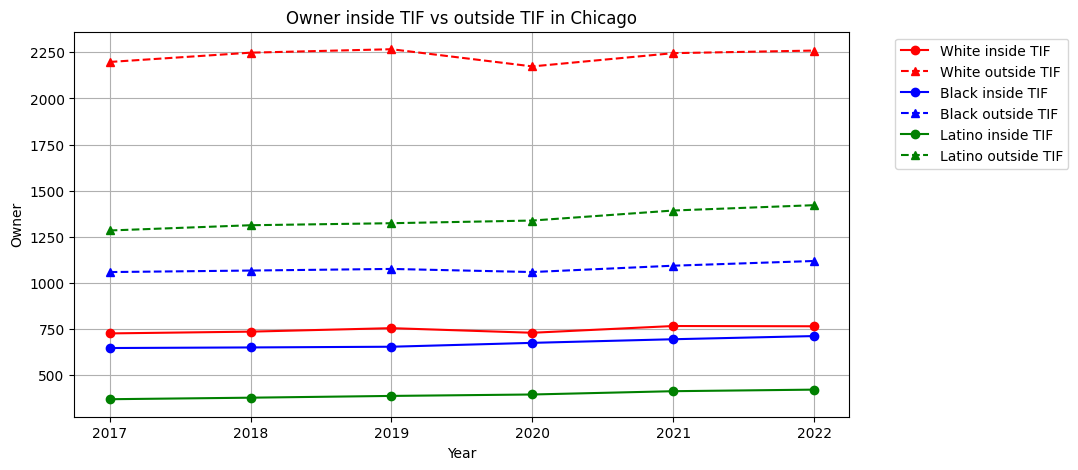

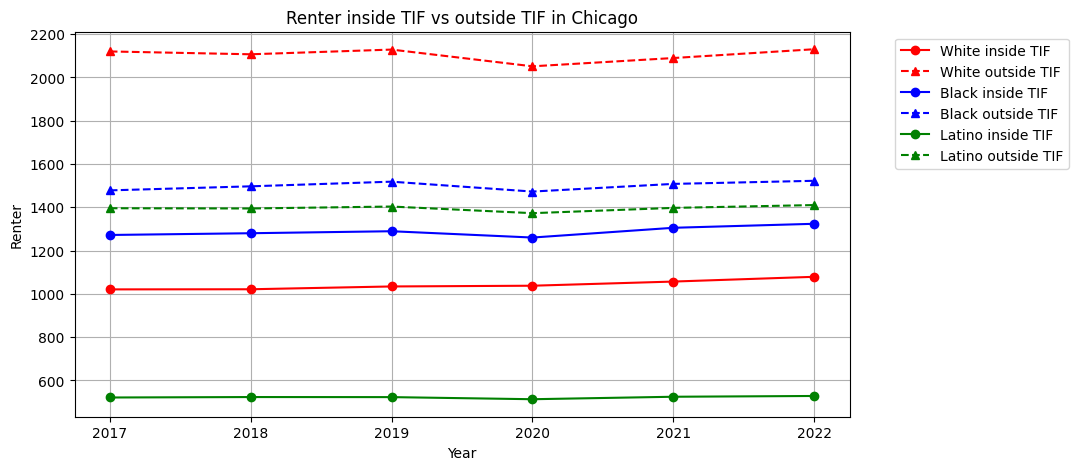

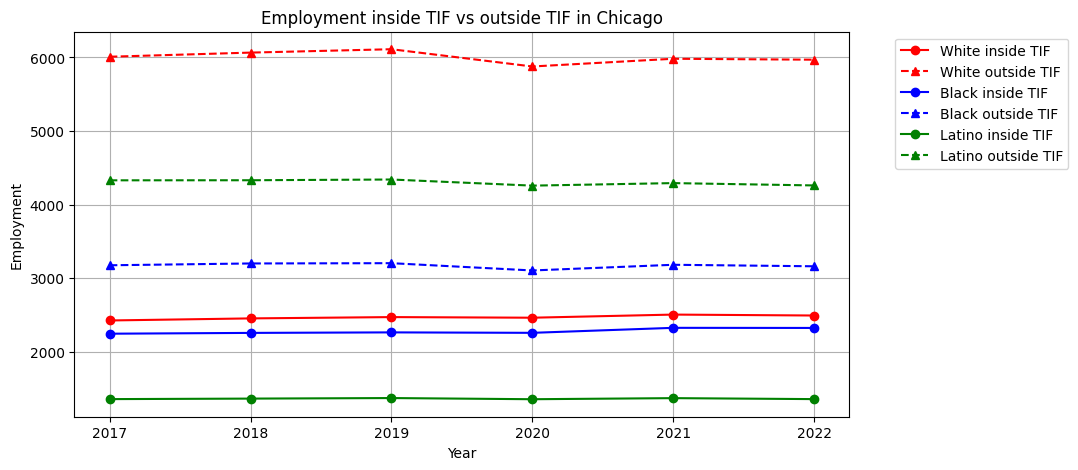

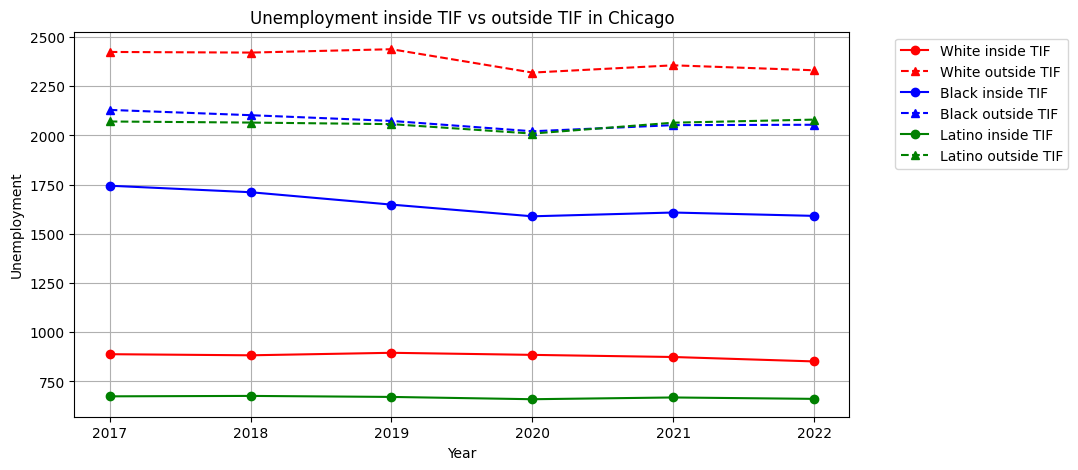

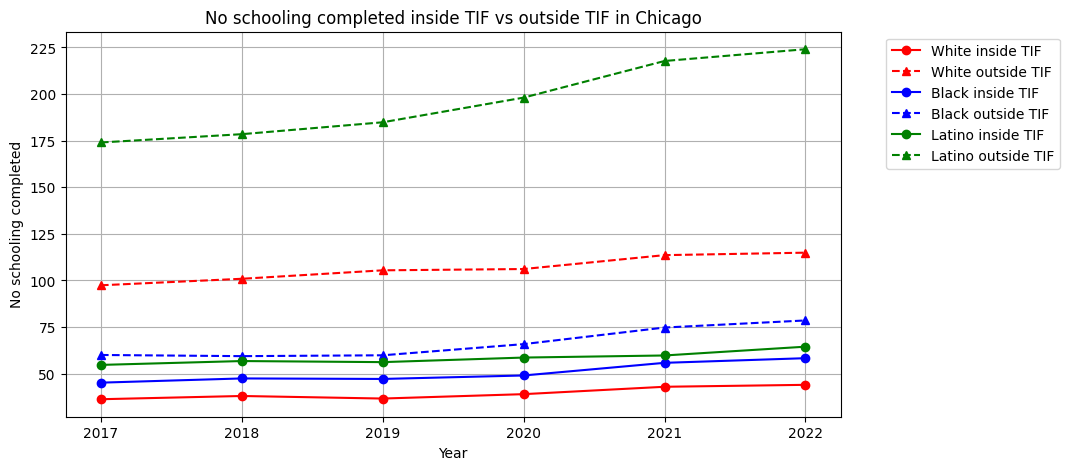

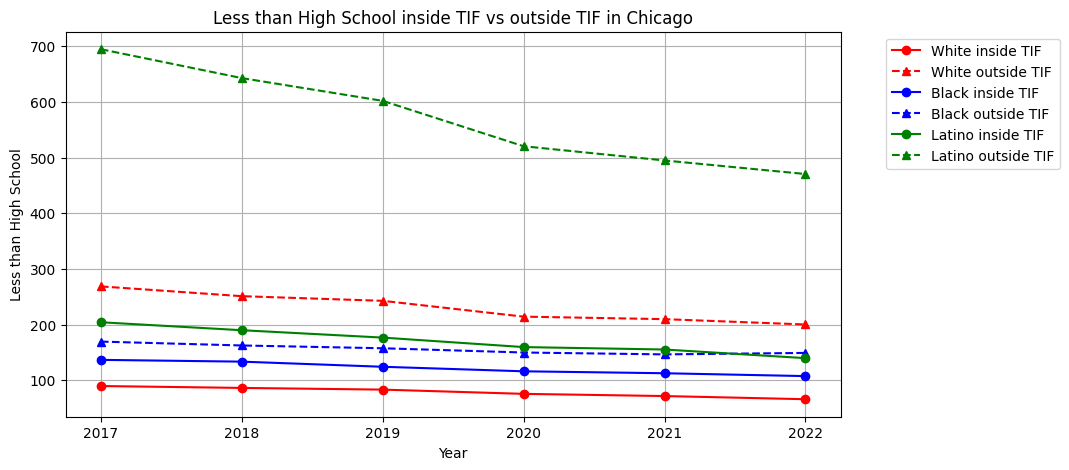

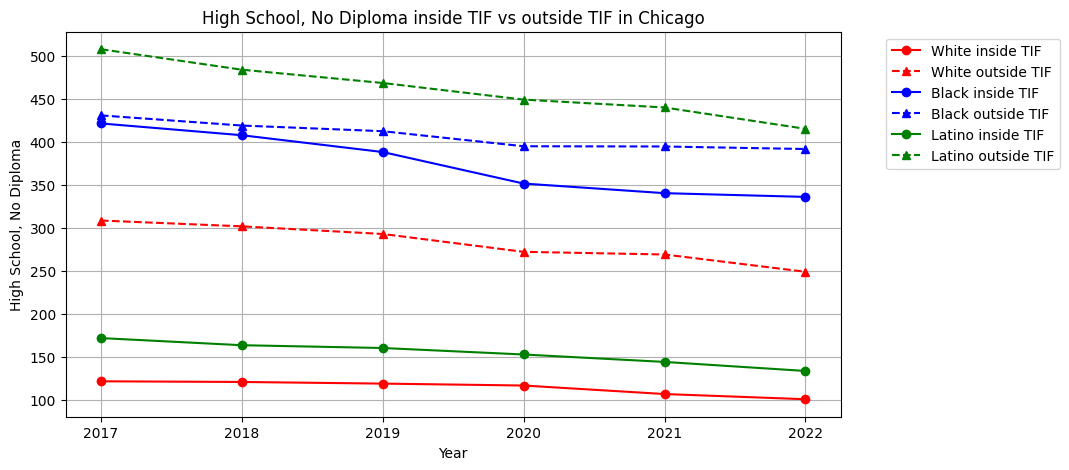

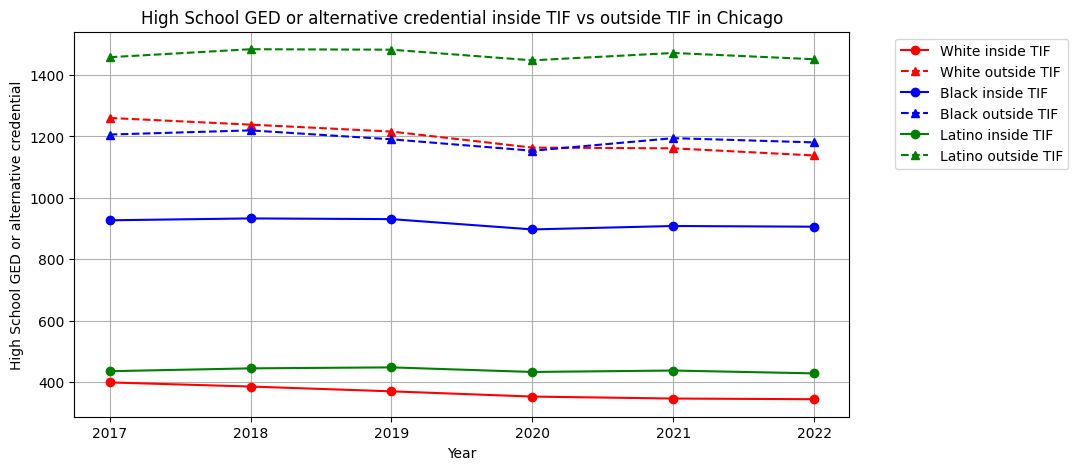

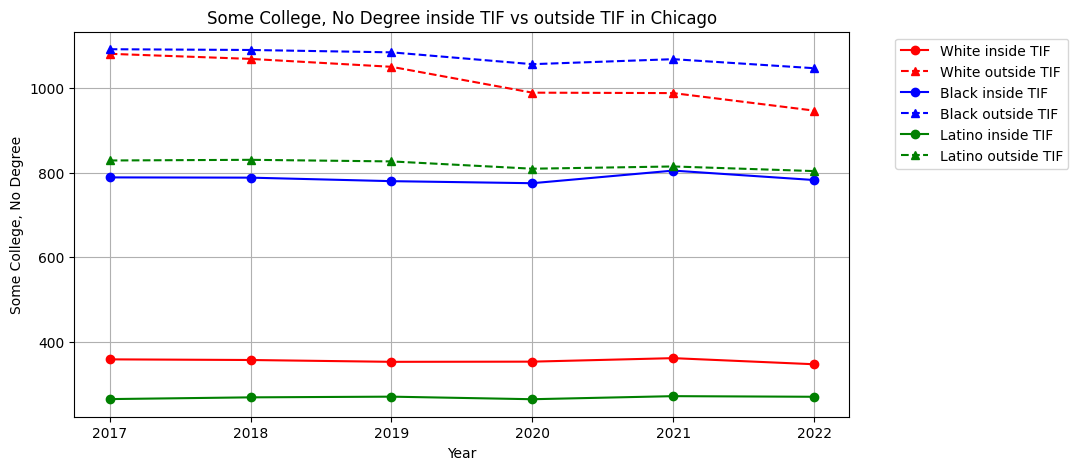

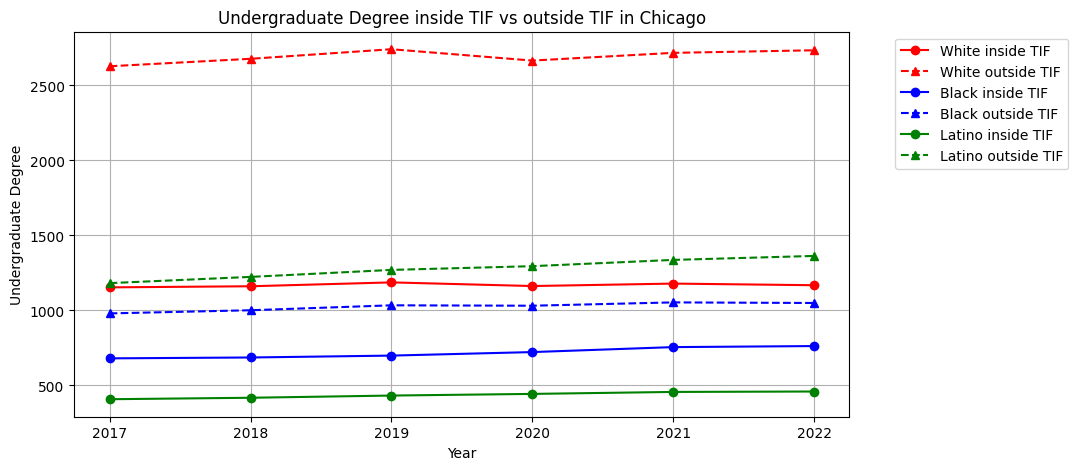

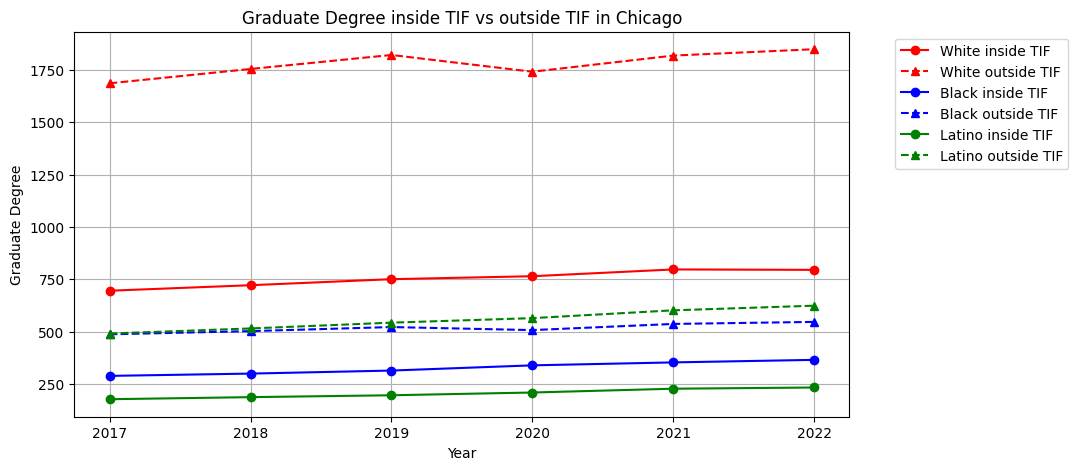

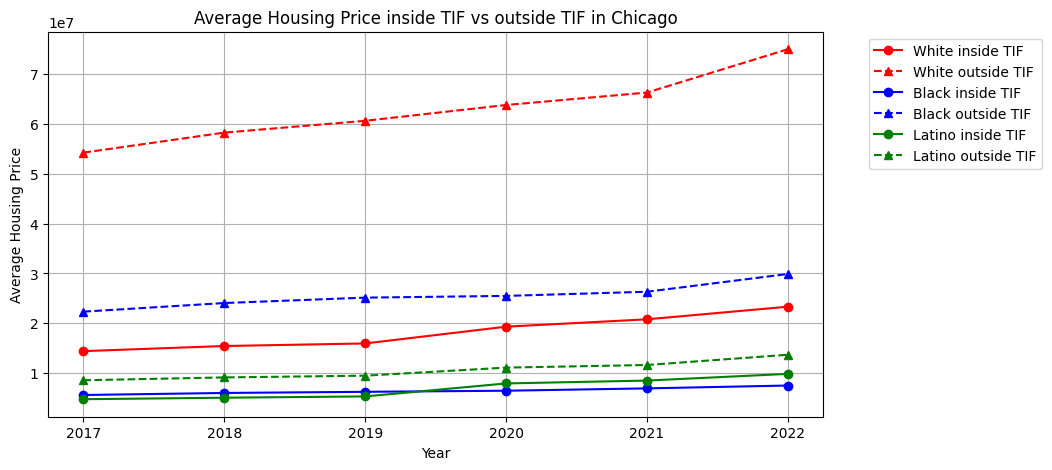

In [ ]:
plot_Chicago(year_race_community_Median_TIF,year_race_community_Median_Non_TIF)
plot_Chicago(year_race_community_Owner_TIF,year_race_community_Owner_Non_TIF)
plot_Chicago(year_race_community_Renter_TIF,year_race_community_Renter_Non_TIF)
plot_Chicago(year_race_community_Employment_TIF,year_race_community_Employment_Non_TIF)
plot_Chicago(year_race_community_Unemployment_TIF,year_race_community_Unemployment_Non_TIF)
plot_Chicago(year_race_community_EducationA_TIF,year_race_community_EducationA_Non_TIF)
plot_Chicago(year_race_community_EducationB_TIF,year_race_community_EducationB_Non_TIF)
plot_Chicago(year_race_community_EducationC_TIF,year_race_community_EducationC_Non_TIF)
plot_Chicago(year_race_community_EducationD_TIF,year_race_community_EducationD_Non_TIF)
plot_Chicago(year_race_community_EducationE_TIF,year_race_community_EducationE_Non_TIF)
plot_Chicago(year_race_community_EducationF_TIF,year_race_community_EducationF_Non_TIF)
plot_Chicago(year_race_community_EducationG_TIF,year_race_community_EducationG_Non_TIF)
plot_Chicago(year_race_community_AverageHousingPrice_TIF,year_race_community_AverageHousingPrice_Non_TIF)